In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# print the Classification Report
target_names = ['क','ख','ग','घ','ङ','च','छ','ज','झ','ञ','ट','ठ',
                'ड','ढ','ण','त','थ','द','ध','न','प','फ','ब','भ',
                'म','य','र','ल','व','श','ष','स','ह','क्ष','त्र','ज्ञ',
                '०','१','२','३','४','५','६','७','८','९']

In [3]:
#1. Load train data set
data=pd.read_csv("D:/Dataset/NHWCSVDataset/nhwDatsetTrain.csv")
print("Data Shape: ",data.shape)
data.head()

Data Shape:  (78200, 1025)


,1*1,1*2,1*3,1*4,1*5,1*6,1*7,1*8,1*9,1*10,...,32*24,32*25,32*26,32*27,32*28,32*29,32*30,32*31,32*32,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78200 entries, 0 to 78199
Columns: 1025 entries, 1*1 to Label
dtypes: int64(1025)
memory usage: 611.5 MB


In [5]:
# check unique label column
np.unique(data['Label'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [6]:
# count the total number of each digit count
data['Label'].value_counts()

45    1700
11    1700
20    1700
19    1700
18    1700
17    1700
16    1700
15    1700
14    1700
13    1700
12    1700
10    1700
44    1700
9     1700
8     1700
7     1700
6     1700
5     1700
4     1700
3     1700
2     1700
1     1700
21    1700
22    1700
23    1700
24    1700
43    1700
42    1700
41    1700
40    1700
39    1700
38    1700
37    1700
36    1700
35    1700
34    1700
33    1700
32    1700
31    1700
30    1700
29    1700
28    1700
27    1700
26    1700
25    1700
0     1700
Name: Label, dtype: int64

Text(0.5, 1.0, 'NHW Character')

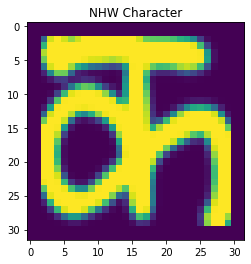

In [7]:
# Display Characters
zero = data.iloc[1, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("NHW Character")

Text(0.5, 1.0, 'Tin')

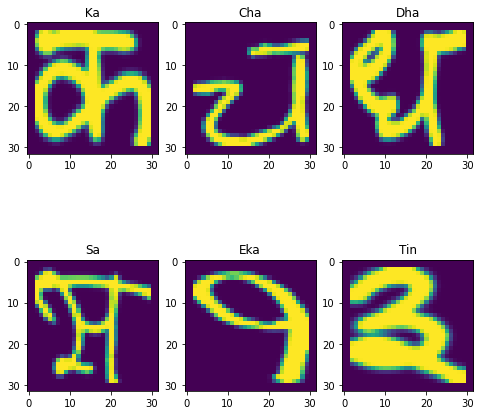

In [8]:
plt.figure(figsize=(8,8))

plt.subplot(2,3,1)  # 2--rows and 2--columns  index=1
zero = data.iloc[1, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title(" Ka ")

plt.subplot(2,3,2)  # 2--rows and 2--columns  index=2
zero = data.iloc[9001, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Cha")

plt.subplot(2,3,3)   # 2--rows and 2--columns  index=3
zero = data.iloc[31000, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Dha")

plt.subplot(2,3,4)   # 2--rows and 2--columns  index=3
zero = data.iloc[53000, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Sa")

plt.subplot(2,3,5)   # 2--rows and 2--columns  index=3
zero = data.iloc[63000, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Eka")

plt.subplot(2,3,6)   # 2--rows and 2--columns  index=3
zero = data.iloc[67000, 0:-1]
zero = zero.values.reshape(32,32)
plt.imshow(zero)
plt.title("Tin")

In [9]:
# 2. Split Dataset in Features and Traget Variables
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]
#print("X: ",Train_X)
#print("Y: ",Train_Y)

In [25]:
from sklearn.preprocessing import MinMaxScaler
# 3. If needed , Normalize data
X = MinMaxScaler().fit_transform(X)

In [26]:
# 4. Split Dataset into training and Testing sets
Train_X,Test_X, Train_Y,Test_Y=train_test_split(X,Y,test_size=0.25,random_state=1)
print("X_train: ",Train_X.shape)
print("X_test: ",Test_X.shape)
print("Y_train: ",Train_Y.shape)
print("Y_test: ",Test_Y.shape)

X_train:  (58650, 1024)
X_test:  (19550, 1024)
Y_train:  (58650,)
Y_test:  (19550,)


In [ ]:
#5. Define the Classifier Model
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# C:Regularization parameter. default=1.0. The strength of the regularization is inversely proportional to C. 
# degreeint, default=3. Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
# decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’

model=SVC(C=0.5, kernel='rbf',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=1, kernel='rbf',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))
#print(confusion_matrix(Test_Y,ypred))

In [ ]:
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=50, kernel='rbf',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))

In [ ]:
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=500, kernel='rbf',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))

In [ ]:
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=0.1, kernel='linear',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))

print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=1, kernel='linear',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=50, kernel='linear',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=500, kernel='linear',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=0.1, kernel='poly',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=1, kernel='poly',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=50, kernel='poly',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
model=SVC(C=500, kernel='poly',decision_function_shape='ovr')
model=model.fit(Train_X,Train_Y)

#7. Predict the response for test dataset
ypred=model.predict(Test_X)
from sklearn.metrics import accuracy_score 

# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,9):
    j=2*i+1
    knn = KNeighborsClassifier(n_neighbors=j,metric='minkowski',p=2)
    knn.fit(Train_X,Train_Y)
    pred_i = knn.predict(Test_X)
    error_rate.append(np.mean(pred_i != Test_Y))

plt.figure(figsize=(10,6))
plt.plot([1,3,5,7,9,11,13,15],error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
print(error_rate)

In [ ]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=1)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [ ]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

In [12]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=1)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8869053708439898
[[385   1   1 ...   0   0   0]
 [  0 370   6 ...   0   0   0]
 [  0   0 406 ...   0   0   0]
 ...
 [  0   0   0 ... 439   0   0]
 [  0   0   0 ...   0 431   0]
 [  0   0   0 ...   0   0 441]]
              precision    recall  f1-score   support

           क       0.97      0.93      0.95       414
           ख       0.96      0.89      0.92       417
           ग       0.75      0.94      0.84       431
           घ       0.77      0.85      0.81       448
         Nha       0.86      0.83      0.85       422
           च       0.86      0.94      0.90       423
           छ       0.93      0.88      0.90       445
           ज       0.82      0.94      0.88       423
           झ       1.00      0.92      0.96       442
           ञ       0.90      0.91      0.91       448
           ट       0.67      0.94      0.78       420
           ठ       0.89      0.80      0.85       463
           ड       0.81      0.82      0.82       443
           ढ       0.8

In [13]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=51,criterion='gini',max_features='log2')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8706393861892583
              precision    recall  f1-score   support

           क       0.88      0.92      0.90       414
           ख       0.85      0.83      0.84       417
           ग       0.88      0.87      0.87       431
           घ       0.79      0.77      0.78       448
         Nha       0.86      0.86      0.86       422
           च       0.81      0.90      0.85       423
           छ       0.85      0.78      0.81       445
           ज       0.90      0.89      0.89       423
           झ       0.93      0.92      0.92       442
           ञ       0.90      0.89      0.89       448
           ट       0.86      0.93      0.90       420
           ठ       0.87      0.92      0.89       463
           ड       0.85      0.82      0.84       443
           ढ       0.87      0.90      0.89       430
           ण       0.87      0.86      0.86       416
           त       0.87      0.93      0.90       414
           थ       0.81      0.75      0.78       40

In [27]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=51,criterion='gini',max_features='auto')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8782097186700767
              precision    recall  f1-score   support

           क       0.91      0.92      0.91       414
           ख       0.84      0.83      0.83       417
           ग       0.91      0.85      0.88       431
           घ       0.81      0.78      0.80       448
           ङ       0.88      0.85      0.87       422
           च       0.81      0.90      0.85       423
           छ       0.85      0.78      0.81       445
           ज       0.89      0.87      0.88       423
           झ       0.93      0.91      0.92       442
           ञ       0.90      0.90      0.90       448
           ट       0.88      0.94      0.91       420
           ठ       0.89      0.93      0.91       463
           ड       0.87      0.84      0.86       443
           ढ       0.87      0.91      0.89       430
           ण       0.89      0.89      0.89       416
           त       0.92      0.94      0.93       414
           थ       0.80      0.79      0.80       40

In [28]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=51,criterion='entropy',max_features='log2')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8759079283887468
              precision    recall  f1-score   support

           क       0.90      0.91      0.90       414
           ख       0.85      0.85      0.85       417
           ग       0.87      0.87      0.87       431
           घ       0.78      0.79      0.78       448
           ङ       0.87      0.83      0.85       422
           च       0.83      0.91      0.86       423
           छ       0.87      0.79      0.83       445
           ज       0.91      0.91      0.91       423
           झ       0.95      0.92      0.93       442
           ञ       0.90      0.87      0.89       448
           ट       0.85      0.92      0.89       420
           ठ       0.88      0.92      0.90       463
           ड       0.83      0.82      0.82       443
           ढ       0.89      0.91      0.90       430
           ण       0.89      0.89      0.89       416
           त       0.89      0.94      0.91       414
           थ       0.81      0.81      0.81       40

In [29]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=51,criterion='entropy',max_features='auto')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8859335038363171
              precision    recall  f1-score   support

           क       0.93      0.94      0.93       414
           ख       0.87      0.85      0.86       417
           ग       0.92      0.88      0.90       431
           घ       0.81      0.79      0.80       448
           ङ       0.87      0.85      0.86       422
           च       0.84      0.92      0.88       423
           छ       0.87      0.81      0.84       445
           ज       0.90      0.90      0.90       423
           झ       0.94      0.91      0.93       442
           ञ       0.92      0.89      0.91       448
           ट       0.89      0.93      0.91       420
           ठ       0.89      0.93      0.91       463
           ड       0.86      0.84      0.85       443
           ढ       0.89      0.94      0.92       430
           ण       0.89      0.92      0.90       416
           त       0.90      0.94      0.92       414
           थ       0.83      0.81      0.82       40

In [30]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=101,criterion='gini',max_features='log2')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8901790281329923
              precision    recall  f1-score   support

           क       0.91      0.92      0.91       414
           ख       0.88      0.86      0.87       417
           ग       0.91      0.86      0.89       431
           घ       0.83      0.79      0.81       448
           ङ       0.90      0.89      0.89       422
           च       0.84      0.91      0.87       423
           छ       0.91      0.80      0.85       445
           ज       0.91      0.88      0.90       423
           झ       0.95      0.93      0.94       442
           ञ       0.92      0.89      0.90       448
           ट       0.88      0.94      0.91       420
           ठ       0.90      0.93      0.91       463
           ड       0.87      0.84      0.85       443
           ढ       0.89      0.93      0.91       430
           ण       0.90      0.90      0.90       416
           त       0.90      0.93      0.91       414
           थ       0.86      0.83      0.84       40

In [31]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=101,criterion='gini',max_features='auto')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8959079283887468
              precision    recall  f1-score   support

           क       0.91      0.92      0.91       414
           ख       0.89      0.87      0.88       417
           ग       0.91      0.88      0.89       431
           घ       0.83      0.80      0.82       448
           ङ       0.89      0.89      0.89       422
           च       0.84      0.91      0.88       423
           छ       0.90      0.80      0.85       445
           ज       0.92      0.90      0.91       423
           झ       0.94      0.91      0.93       442
           ञ       0.93      0.89      0.91       448
           ट       0.91      0.93      0.92       420
           ठ       0.91      0.94      0.92       463
           ड       0.90      0.87      0.89       443
           ढ       0.90      0.94      0.92       430
           ण       0.90      0.91      0.91       416
           त       0.89      0.95      0.92       414
           थ       0.85      0.82      0.84       40

In [32]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=101,criterion='entropy',max_features='log2')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8936061381074168
              precision    recall  f1-score   support

           क       0.92      0.92      0.92       414
           ख       0.91      0.86      0.88       417
           ग       0.90      0.87      0.88       431
           घ       0.83      0.78      0.80       448
           ङ       0.90      0.90      0.90       422
           च       0.84      0.91      0.87       423
           छ       0.91      0.79      0.85       445
           ज       0.93      0.89      0.91       423
           झ       0.95      0.93      0.94       442
           ञ       0.94      0.89      0.91       448
           ट       0.89      0.94      0.92       420
           ठ       0.90      0.92      0.91       463
           ड       0.88      0.85      0.87       443
           ढ       0.88      0.92      0.90       430
           ण       0.90      0.91      0.91       416
           त       0.90      0.95      0.93       414
           थ       0.86      0.81      0.83       40

In [34]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=101,criterion='entropy',max_features='auto')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.89923273657289
              precision    recall  f1-score   support

           क       0.92      0.93      0.93       414
           ख       0.90      0.87      0.88       417
           ग       0.93      0.89      0.91       431
           घ       0.86      0.81      0.84       448
           ङ       0.91      0.87      0.89       422
           च       0.87      0.92      0.89       423
           छ       0.89      0.80      0.84       445
           ज       0.93      0.90      0.91       423
           झ       0.94      0.93      0.94       442
           ञ       0.95      0.90      0.92       448
           ट       0.89      0.94      0.91       420
           ठ       0.90      0.93      0.92       463
           ड       0.90      0.87      0.88       443
           ढ       0.90      0.94      0.92       430
           ण       0.92      0.93      0.92       416
           त       0.91      0.94      0.93       414
           थ       0.85      0.85      0.85       406


In [35]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=151,criterion='gini',max_features='auto')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.9033759590792839
              precision    recall  f1-score   support

           क       0.93      0.93      0.93       414
           ख       0.90      0.89      0.89       417
           ग       0.93      0.88      0.91       431
           घ       0.85      0.82      0.83       448
           ङ       0.92      0.88      0.90       422
           च       0.85      0.91      0.88       423
           छ       0.92      0.79      0.85       445
           ज       0.94      0.89      0.91       423
           झ       0.94      0.93      0.93       442
           ञ       0.95      0.91      0.93       448
           ट       0.90      0.95      0.93       420
           ठ       0.91      0.94      0.92       463
           ड       0.89      0.87      0.88       443
           ढ       0.91      0.95      0.93       430
           ण       0.91      0.92      0.92       416
           त       0.92      0.94      0.93       414
           थ       0.86      0.82      0.84       40

In [36]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=151,criterion='gini',max_features='log2')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.8982608695652174
              precision    recall  f1-score   support

           क       0.91      0.92      0.92       414
           ख       0.93      0.88      0.91       417
           ग       0.92      0.88      0.90       431
           घ       0.84      0.78      0.81       448
           ङ       0.92      0.88      0.90       422
           च       0.85      0.91      0.88       423
           छ       0.90      0.80      0.85       445
           ज       0.94      0.90      0.92       423
           झ       0.96      0.93      0.94       442
           ञ       0.94      0.91      0.92       448
           ट       0.90      0.94      0.92       420
           ठ       0.91      0.94      0.92       463
           ड       0.88      0.84      0.86       443
           ढ       0.89      0.94      0.91       430
           ण       0.92      0.89      0.91       416
           त       0.90      0.95      0.92       414
           थ       0.85      0.83      0.84       40

In [37]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=151,criterion='entropy',max_features='auto')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.9061381074168798
              precision    recall  f1-score   support

           क       0.94      0.94      0.94       414
           ख       0.90      0.88      0.89       417
           ग       0.94      0.89      0.91       431
           घ       0.86      0.81      0.83       448
           ङ       0.91      0.87      0.89       422
           च       0.86      0.92      0.89       423
           छ       0.93      0.81      0.87       445
           ज       0.92      0.90      0.91       423
           झ       0.96      0.93      0.95       442
           ञ       0.94      0.89      0.92       448
           ट       0.89      0.93      0.91       420
           ठ       0.90      0.95      0.92       463
           ड       0.89      0.87      0.88       443
           ढ       0.90      0.94      0.92       430
           ण       0.91      0.93      0.92       416
           त       0.92      0.95      0.93       414
           थ       0.85      0.84      0.84       40

In [38]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=151,criterion='entropy',max_features='log2')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.9039897698209719
              precision    recall  f1-score   support

           क       0.94      0.93      0.94       414
           ख       0.91      0.87      0.89       417
           ग       0.93      0.88      0.91       431
           घ       0.84      0.79      0.82       448
           ङ       0.91      0.88      0.90       422
           च       0.84      0.91      0.88       423
           छ       0.91      0.82      0.86       445
           ज       0.93      0.91      0.92       423
           झ       0.96      0.93      0.94       442
           ञ       0.94      0.90      0.92       448
           ट       0.89      0.95      0.92       420
           ठ       0.92      0.94      0.93       463
           ड       0.89      0.86      0.88       443
           ढ       0.91      0.94      0.92       430
           ण       0.95      0.92      0.93       416
           त       0.91      0.95      0.93       414
           थ       0.88      0.81      0.84       40

In [39]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# If “auto”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# criterion{“gini”, “entropy”}, default=”gini”

rfmodel= RandomForestClassifier(n_estimators=251,criterion='entropy',max_features='auto')
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

accuracy: 0.9081329923273658
              precision    recall  f1-score   support

           क       0.94      0.93      0.94       414
           ख       0.93      0.89      0.91       417
           ग       0.95      0.91      0.93       431
           घ       0.87      0.82      0.84       448
           ङ       0.93      0.87      0.90       422
           च       0.86      0.91      0.89       423
           छ       0.92      0.82      0.86       445
           ज       0.94      0.91      0.92       423
           झ       0.96      0.94      0.95       442
           ञ       0.95      0.90      0.93       448
           ट       0.90      0.94      0.92       420
           ठ       0.90      0.94      0.92       463
           ड       0.90      0.89      0.90       443
           ढ       0.92      0.95      0.93       430
           ण       0.93      0.93      0.93       416
           त       0.92      0.95      0.93       414
           थ       0.88      0.84      0.86       40

In [3]:
#1. Load train data set
data=pd.read_csv("D:/Dataset/NHWCSVDataset/nhwDatsetTrain.csv")
print("Train Data Shape: ",data.shape)
#data.head()
Train_X=data.iloc[:,0:-1]
Train_Y=data.iloc[:,-1]
#1. Load test data set
data=pd.read_csv("D:/Dataset/NHWCSVDataset/nhwDatsetTest.csv")
print("Test Data Shape: ",data.shape)
#print(data.head())
Test_X=data.iloc[:,0:-1]
Test_Y=data.iloc[:,-1]
#print("X: ",Test_X)
#print("Y: ",Test_Y)

Train Data Shape:  (78200, 1025)
Test Data Shape:  (13800, 1025)


In [4]:
from sklearn.preprocessing import MinMaxScaler
# 3. If needed , Normalize data
Train_X = MinMaxScaler().fit_transform(Train_X)
Test_X = MinMaxScaler().fit_transform(Test_X)

In [5]:
# Split Dataset into training and Testing sets
#X_train,X_test, Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=1)
print("X_train: ",Train_X.shape)
print("X_test: ",Test_X.shape)
print("Y_train: ",Train_Y.shape)
print("Y_test: ",Test_Y.shape)

X_train:  (78200, 1024)
X_test:  (13800, 1024)
Y_train:  (78200,)
Y_test:  (13800,)


In [6]:
from keras.utils import to_categorical
# convert to one-hot vector
Train_Y = to_categorical(Train_Y)
Test_Y = to_categorical(Test_Y)

In [54]:
#print(Train_Y)
#print(Test_Y)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Activation

# define the keras model
model = Sequential()
model.add(Dense(400, input_dim=1024,  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-3)))
model.add(Activation(activation='relu'))
model.add(Dense(200,  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-3)))
model.add(Activation(activation='relu'))

model.add(Dense(100,   kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-3)))
model.add(Activation(activation='relu'))

model.add(Dense(50,kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-3)))
model.add(Activation(activation='relu'))

model.add(Dense(46, activation='softmax'))

from keras.optimizers import Adam
opt = Adam(learning_rate=0.00019)
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# fit the keras model on the dataset
History=model.fit(Train_X,Train_Y,validation_data=(Test_X, Test_Y), epochs=300, batch_size=256,verbose=1)

Epoch 1/300
306/306 [==============================] - 4s 14ms/step - loss: 5.4258 - accuracy: 0.2911 - val_loss: 4.1651 - val_accuracy: 0.5252
Epoch 2/300
306/306 [==============================] - 4s 13ms/step - loss: 3.7039 - accuracy: 0.5929 - val_loss: 3.3401 - val_accuracy: 0.6533
Epoch 3/300
306/306 [==============================] - 4s 13ms/step - loss: 3.1521 - accuracy: 0.6756 - val_loss: 2.9797 - val_accuracy: 0.6977
Epoch 4/300
306/306 [==============================] - 4s 14ms/step - loss: 2.8551 - accuracy: 0.7168 - val_loss: 2.7305 - val_accuracy: 0.7311
Epoch 5/300
306/306 [==============================] - 4s 13ms/step - loss: 2.6391 - accuracy: 0.7472 - val_loss: 2.5478 - val_accuracy: 0.7540
Epoch 6/300
306/306 [==============================] - 4s 13ms/step - loss: 2.4632 - accuracy: 0.7709 - val_loss: 2.3842 - val_accuracy: 0.7777
Epoch 7/300
306/306 [==============================] - 4s 13ms/step - loss: 2.3170 - accuracy: 0.7897 - val_loss: 2.2560 - val_accuracy:

306/306 [==============================] - 4s 12ms/step - loss: 0.6853 - accuracy: 0.9656 - val_loss: 0.7962 - val_accuracy: 0.9260
Epoch 114/300
306/306 [==============================] - 4s 12ms/step - loss: 0.6840 - accuracy: 0.9656 - val_loss: 0.7894 - val_accuracy: 0.9254
Epoch 115/300
306/306 [==============================] - 4s 12ms/step - loss: 0.6810 - accuracy: 0.9665 - val_loss: 0.7880 - val_accuracy: 0.9270
Epoch 116/300
306/306 [==============================] - 4s 12ms/step - loss: 0.6794 - accuracy: 0.9659 - val_loss: 0.7888 - val_accuracy: 0.9264
Epoch 117/300
306/306 [==============================] - 4s 12ms/step - loss: 0.6776 - accuracy: 0.9664 - val_loss: 0.7851 - val_accuracy: 0.9257
Epoch 118/300
306/306 [==============================] - 4s 13ms/step - loss: 0.6753 - accuracy: 0.9669 - val_loss: 0.7906 - val_accuracy: 0.9233
Epoch 119/300
306/306 [==============================] - 4s 13ms/step - loss: 0.6736 - accuracy: 0.9666 - val_loss: 0.7832 - val_accuracy:

306/306 [==============================] - 4s 12ms/step - loss: 0.5305 - accuracy: 0.9812 - val_loss: 0.6771 - val_accuracy: 0.9301
Epoch 226/300
306/306 [==============================] - 4s 13ms/step - loss: 0.5317 - accuracy: 0.9800 - val_loss: 0.6764 - val_accuracy: 0.9276
Epoch 227/300
306/306 [==============================] - 4s 12ms/step - loss: 0.5292 - accuracy: 0.9811 - val_loss: 0.6673 - val_accuracy: 0.9305
Epoch 228/300
306/306 [==============================] - 4s 13ms/step - loss: 0.5288 - accuracy: 0.9809 - val_loss: 0.6727 - val_accuracy: 0.9296
Epoch 229/300
306/306 [==============================] - 4s 12ms/step - loss: 0.5276 - accuracy: 0.9814 - val_loss: 0.6759 - val_accuracy: 0.9302
Epoch 230/300
306/306 [==============================] - 4s 12ms/step - loss: 0.5261 - accuracy: 0.9812 - val_loss: 0.6700 - val_accuracy: 0.9283
Epoch 231/300
306/306 [==============================] - 4s 12ms/step - loss: 0.5257 - accuracy: 0.9817 - val_loss: 0.6662 - val_accuracy:

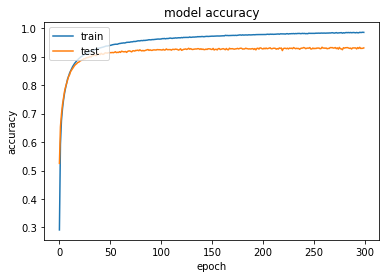

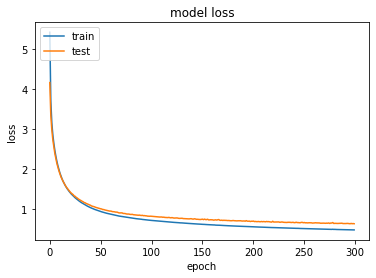

In [35]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Activation

# define the keras model
model = Sequential()
model.add(Dense(300, input_dim=1024,  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-4)))
model.add(Activation(activation='relu'))
model.add(Dense(128,  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-4)))
model.add(Activation(activation='relu'))

model.add(Dense(64,   kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
                                      bias_regularizer=regularizers.l2(1e-4)))
model.add(Activation(activation='relu'))


model.add(Dense(46,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                                      bias_regularizer=regularizers.l2(1e-4)))

model.add(Activation(activation='softmax'))

from keras.optimizers import Adam
opt = Adam(learning_rate=0.00011)
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# fit the keras model on the dataset
History=model.fit(Train_X,Train_Y,validation_data=(Test_X, Test_Y), epochs=300, batch_size=128,verbose=1)

Epoch 1/300
611/611 [==============================] - 5s 8ms/step - loss: 3.9853 - accuracy: 0.4252 - val_loss: 2.8734 - val_accuracy: 0.6261
Epoch 2/300
611/611 [==============================] - 5s 9ms/step - loss: 2.6315 - accuracy: 0.6676 - val_loss: 2.4125 - val_accuracy: 0.7049
Epoch 3/300
611/611 [==============================] - 5s 9ms/step - loss: 2.2911 - accuracy: 0.7199 - val_loss: 2.1560 - val_accuracy: 0.7423
Epoch 4/300
611/611 [==============================] - 5s 8ms/step - loss: 2.0654 - accuracy: 0.7540 - val_loss: 1.9694 - val_accuracy: 0.7628
Epoch 5/300
611/611 [==============================] - 5s 8ms/step - loss: 1.8910 - accuracy: 0.7806 - val_loss: 1.8251 - val_accuracy: 0.7839
Epoch 6/300
611/611 [==============================] - 5s 9ms/step - loss: 1.7534 - accuracy: 0.8012 - val_loss: 1.6959 - val_accuracy: 0.8068
Epoch 7/300
611/611 [==============================] - 6s 9ms/step - loss: 1.6397 - accuracy: 0.8175 - val_loss: 1.5997 - val_accuracy: 0.8181

Epoch 58/300
611/611 [==============================] - 4s 7ms/step - loss: 0.7342 - accuracy: 0.9427 - val_loss: 0.8007 - val_accuracy: 0.9183
Epoch 59/300
611/611 [==============================] - 4s 7ms/step - loss: 0.7311 - accuracy: 0.9429 - val_loss: 0.7975 - val_accuracy: 0.9167
Epoch 60/300
611/611 [==============================] - 4s 7ms/step - loss: 0.7280 - accuracy: 0.9440 - val_loss: 0.7974 - val_accuracy: 0.9167
Epoch 61/300
611/611 [==============================] - 4s 7ms/step - loss: 0.7246 - accuracy: 0.9443 - val_loss: 0.7943 - val_accuracy: 0.9174
Epoch 62/300
611/611 [==============================] - 4s 7ms/step - loss: 0.7226 - accuracy: 0.9434 - val_loss: 0.7886 - val_accuracy: 0.9180
Epoch 63/300
611/611 [==============================] - 4s 7ms/step - loss: 0.7181 - accuracy: 0.9448 - val_loss: 0.7894 - val_accuracy: 0.9172
Epoch 64/300
611/611 [==============================] - 4s 7ms/step - loss: 0.7159 - accuracy: 0.9459 - val_loss: 0.7802 - val_accuracy:

Epoch 115/300
611/611 [==============================] - 4s 7ms/step - loss: 0.6251 - accuracy: 0.9579 - val_loss: 0.7096 - val_accuracy: 0.9254
Epoch 116/300
611/611 [==============================] - 4s 7ms/step - loss: 0.6253 - accuracy: 0.9582 - val_loss: 0.7088 - val_accuracy: 0.9274
Epoch 117/300
611/611 [==============================] - 4s 7ms/step - loss: 0.6237 - accuracy: 0.9581 - val_loss: 0.7151 - val_accuracy: 0.9227
Epoch 118/300
611/611 [==============================] - 4s 7ms/step - loss: 0.6233 - accuracy: 0.9579 - val_loss: 0.7053 - val_accuracy: 0.9280
Epoch 119/300
611/611 [==============================] - 4s 7ms/step - loss: 0.6219 - accuracy: 0.9582 - val_loss: 0.7111 - val_accuracy: 0.9260
Epoch 120/300
611/611 [==============================] - 4s 7ms/step - loss: 0.6206 - accuracy: 0.9589 - val_loss: 0.7089 - val_accuracy: 0.9260
Epoch 121/300
611/611 [==============================] - 4s 7ms/step - loss: 0.6189 - accuracy: 0.9582 - val_loss: 0.7053 - val_ac

611/611 [==============================] - 4s 7ms/step - loss: 0.5570 - accuracy: 0.9688 - val_loss: 0.6614 - val_accuracy: 0.9300
Epoch 228/300
611/611 [==============================] - 5s 8ms/step - loss: 0.5566 - accuracy: 0.9692 - val_loss: 0.6535 - val_accuracy: 0.9337
Epoch 229/300
611/611 [==============================] - 5s 8ms/step - loss: 0.5556 - accuracy: 0.9693 - val_loss: 0.6634 - val_accuracy: 0.9307
Epoch 230/300
611/611 [==============================] - 5s 8ms/step - loss: 0.5551 - accuracy: 0.9697 - val_loss: 0.6601 - val_accuracy: 0.9314
Epoch 231/300
611/611 [==============================] - 4s 7ms/step - loss: 0.5553 - accuracy: 0.9702 - val_loss: 0.6546 - val_accuracy: 0.9335
Epoch 232/300
611/611 [==============================] - 4s 7ms/step - loss: 0.5545 - accuracy: 0.9696 - val_loss: 0.6548 - val_accuracy: 0.9335
Epoch 233/300
611/611 [==============================] - 4s 7ms/step - loss: 0.5545 - accuracy: 0.9698 - val_loss: 0.6601 - val_accuracy: 0.9300

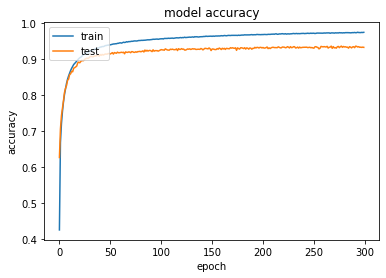

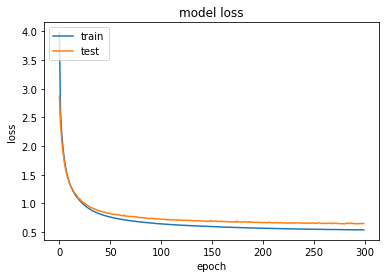

In [14]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()